In \[1\]:

    import numpy as np 
    import pandas as pd
    import matplotlib as mp
    import matplotlib.pyplot as plt
    import seaborn as sns
    import sklearn

In \[2\]:

    placement = pd.read_csv("Placement_Data_Full_Class.csv")

In \[3\]:

    placement.head(2)

Out\[3\]:

|     | sl_no | gender | ssc_p | ssc_b   | hsc_p | hsc_b  | hsc_s    | degree_p | degree_t | workex | etest_p | specialisation | mba_p | status | salary   |
|-----|-------|--------|-------|---------|-------|--------|----------|----------|----------|--------|---------|----------------|-------|--------|----------|
| 0   | 1     | M      | 67.00 | Others  | 91.00 | Others | Commerce | 58.00    | Sci&Tech | No     | 55.0    | Mkt&HR         | 58.80 | Placed | 270000.0 |
| 1   | 2     | M      | 79.33 | Central | 78.33 | Others | Science  | 77.48    | Sci&Tech | Yes    | 86.5    | Mkt&Fin        | 66.28 | Placed | 200000.0 |

In \[4\]:

    placement_copy = placement.copy()

In \[5\]:

    placement_copy.isnull().sum()

Out\[5\]:

    sl_no              0
    gender             0
    ssc_p              0
    ssc_b              0
    hsc_p              0
    hsc_b              0
    hsc_s              0
    degree_p           0
    degree_t           0
    workex             0
    etest_p            0
    specialisation     0
    mba_p              0
    status             0
    salary            67
    dtype: int64

In \[6\]:

    placement_copy['salary'].fillna(value = 0, inplace = True)

In \[7\]:

    placement_copy.drop(['sl_no','ssc_b','hsc_b'], axis = 1 , inplace = True)

In \[8\]:

    placement_copy.head(5)

Out\[8\]:

|     | gender | ssc_p | hsc_p | hsc_s    | degree_p | degree_t  | workex | etest_p | specialisation | mba_p | status     | salary   |
|-----|--------|-------|-------|----------|----------|-----------|--------|---------|----------------|-------|------------|----------|
| 0   | M      | 67.00 | 91.00 | Commerce | 58.00    | Sci&Tech  | No     | 55.0    | Mkt&HR         | 58.80 | Placed     | 270000.0 |
| 1   | M      | 79.33 | 78.33 | Science  | 77.48    | Sci&Tech  | Yes    | 86.5    | Mkt&Fin        | 66.28 | Placed     | 200000.0 |
| 2   | M      | 65.00 | 68.00 | Arts     | 64.00    | Comm&Mgmt | No     | 75.0    | Mkt&Fin        | 57.80 | Placed     | 250000.0 |
| 3   | M      | 56.00 | 52.00 | Science  | 52.00    | Sci&Tech  | No     | 66.0    | Mkt&HR         | 59.43 | Not Placed | 0.0      |
| 4   | M      | 85.80 | 73.60 | Commerce | 73.30    | Comm&Mgmt | No     | 96.8    | Mkt&Fin        | 55.50 | Placed     | 425000.0 |

# outlier handling<a href="#outlier-handling" class="anchor-link">¶</a>

## checking the presence of outlier using boxplots<a href="#checking-the-presence-of-outlier-using-boxplots"
class="anchor-link">¶</a>

In \[9\]:

    plt.figure(figsize = (15,10))

    ax = plt.subplot(221) #splitting the area into 2X2 matrix and particularly concentrate on 1st plot
    plt.boxplot(placement_copy['ssc_p'])
    ax.set_title('Secondary School Percentage')
    ax = plt.subplot(222)
    plt.boxplot(placement_copy['hsc_p'])
    ax.set_title('Higher secondary Percentage')

    ax = plt.subplot(223)
    plt.boxplot(placement_copy['degree_p'])
    ax.set_title('UG Percentage')

    ax = plt.subplot(224)
    plt.boxplot(placement_copy['etest_p'])
    ax.set_title('Employability Percentage')

Out\[9\]:

    Text(0.5, 1.0, 'Employability Percentage')

<img
src="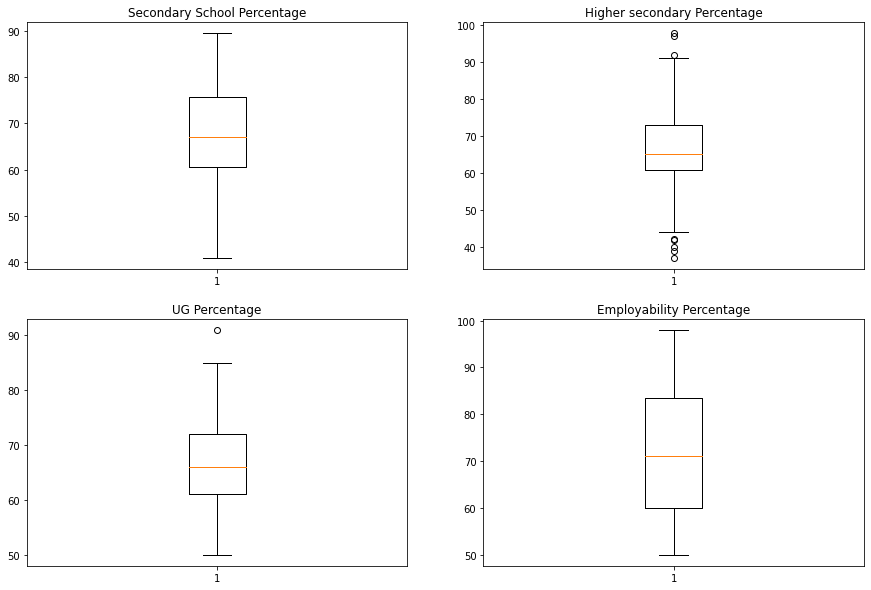%0A"
class="jp-needs-light-background" />

In \[10\]:

    #can be observed that there are outliers in higher secondary percentage and UG percentage
    Q1 = placement_copy['hsc_p'].quantile(0.25)
    Q3 = placement_copy['hsc_p'].quantile(0.75)
    IQR = Q3 - Q1

    filter = (placement_copy['hsc_p'] >= Q1 - 1.5 * IQR) & (placement_copy['hsc_p']<= Q3+ 1.5*IQR) #creating the filter
    placement_filtered= placement_copy.loc[filter] #passing the flter inside dataframe and new filtered data framme is formed

In \[11\]:

    plt.boxplot(placement_filtered['hsc_p'])

Out\[11\]:

    {'whiskers': [<matplotlib.lines.Line2D at 0x23800076cd0>,
      <matplotlib.lines.Line2D at 0x23800076fa0>],
     'caps': [<matplotlib.lines.Line2D at 0x238000862b0>,
      <matplotlib.lines.Line2D at 0x238000606a0>],
     'boxes': [<matplotlib.lines.Line2D at 0x23800076a00>],
     'medians': [<matplotlib.lines.Line2D at 0x238000867f0>],
     'fliers': [<matplotlib.lines.Line2D at 0x23800086ac0>],
     'means': []}

<img
src="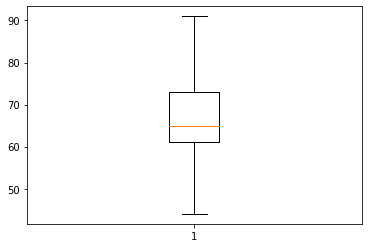%0A"
class="jp-needs-light-background" />

In \[12\]:

    #all the outliers are removed 
    # next is data visualization by using count plot

visuals

In \[13\]:

    plt.figure(figsize = (15,7))

    plt.subplot(231)
    ax = sns.countplot(x= 'gender' , data = placement_filtered)

    plt.subplot(232)
    ax = sns.countplot(x= 'hsc_s' , data = placement_filtered)

    plt.subplot(233)
    ax = sns.countplot(x= 'degree_t' , data =placement_filtered)

    plt.subplot(234)
    ax = sns.countplot(x= 'specialisation' , data = placement_filtered)

    plt.subplot(235)
    ax = sns.countplot(x= 'workex' , data = placement_filtered)

    plt.subplot(236)
    ax = sns.countplot(x= 'status' , data =placement_filtered)

<img
src="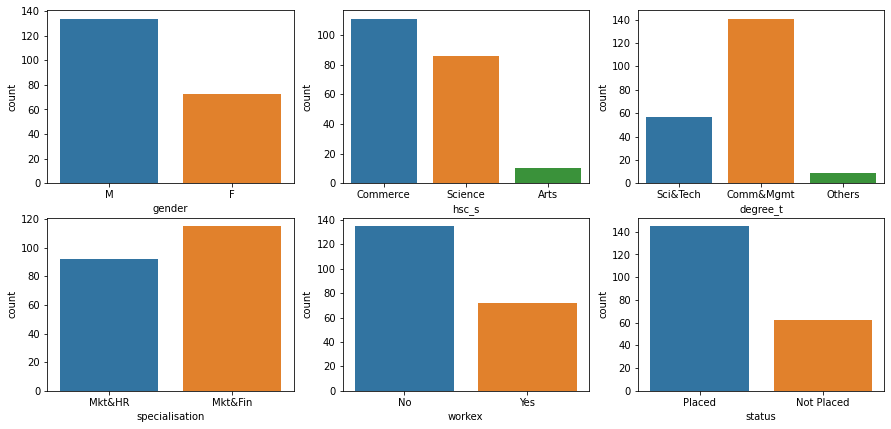%0A"
class="jp-needs-light-background" />

In \[14\]:

    import plotly.express as px

In \[15\]:

    placement_filtered.groupby(["gender","status"]).size().unstack()

Out\[15\]:

| status | Not Placed | Placed |
|--------|------------|--------|
| gender |            |        |
| F      | 27         | 46     |
| M      | 35         | 99     |

In \[16\]:

    # based on gender
    placement_filtered.groupby(["gender","status"]).size().groupby(level=0).apply(
        lambda x: 100 * x / x.sum()
    ).unstack().plot(kind='bar',stacked=True)

    plt.gca().yaxis.set_major_formatter(mp.ticker.PercentFormatter())
    plt.legend(loc = 'upper right',title = 'Status')
    plt.show()

    # There was gender-bias in placement. More number of males were placed.

<img
src="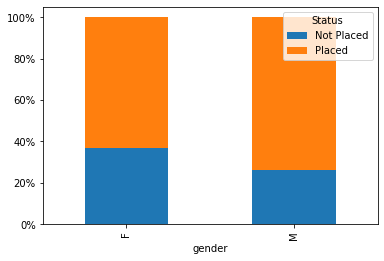%0A"
class="jp-needs-light-background" />

In \[17\]:

    # Post Graduation(MBA)- Specialization
    placement_filtered.groupby(["specialisation","status"]).size().groupby(level=0).apply(
        lambda x: 100 * x / x.sum()
    ).unstack().plot(kind='bar',stacked=True)

    plt.gca().yaxis.set_major_formatter(mp.ticker.PercentFormatter())
    plt.legend(loc = 'upper right',title = 'specialisation')
    plt.show()

    #students from mrkt&finance are more likely to get placed than mrkt&hr

<img
src="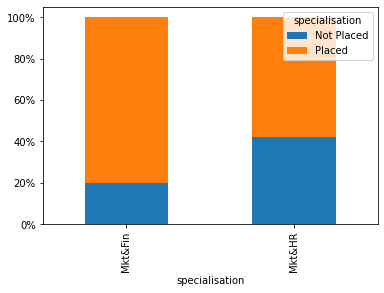%0A"
class="jp-needs-light-background" />

In \[18\]:

    placement_filtered.groupby(["specialisation","status"]).size().unstack()

Out\[18\]:

| status         | Not Placed | Placed |
|----------------|------------|--------|
| specialisation |            |        |
| Mkt&Fin        | 23         | 92     |
| Mkt&HR         | 39         | 53     |

In \[19\]:

    placement_filtered.groupby(["workex","status"]).size().unstack()

Out\[19\]:

| status | Not Placed | Placed |
|--------|------------|--------|
| workex |            |        |
| No     | 52         | 83     |
| Yes    | 10         | 62     |

In \[20\]:

    # Specialization in Higher Secondary Education
    placement_filtered.groupby(["hsc_s","status"]).size().groupby(level=0).apply(
        lambda x: 100 * x / x.sum()
    ).unstack().plot(kind='bar',stacked=True)

    plt.gca().yaxis.set_major_formatter(mp.ticker.PercentFormatter())
    plt.legend(loc = 'upper right',title = 'Higher Education Specialization')
    plt.show()

    # Students from commerce and science background have more chances to get placed.

<img
src="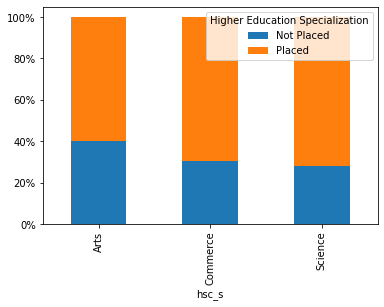%0A"
class="jp-needs-light-background" />

In \[21\]:

    placement_filtered.groupby(["hsc_s","status"]).size().unstack()

Out\[21\]:

| status   | Not Placed | Placed |
|----------|------------|--------|
| hsc_s    |            |        |
| Arts     | 4          | 6      |
| Commerce | 34         | 77     |
| Science  | 24         | 62     |

In \[22\]:

    # Work Experience
    placement_filtered.groupby(["workex","status"]).size().groupby(level=0).apply(
        lambda x: 100 * x / x.sum()
    ).unstack().plot(kind='bar',stacked=True)

    plt.gca().yaxis.set_major_formatter(mp.ticker.PercentFormatter())
    plt.legend(loc = 'upper right',title = 'Work experience')
    plt.show()

    #Students having work experience are more likely to get placed .

<img
src="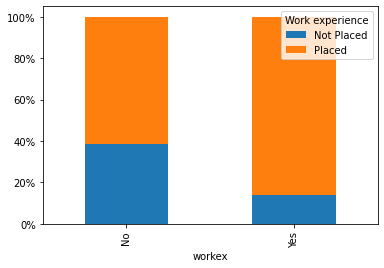%0A"
class="jp-needs-light-background" />

In \[23\]:

    #encoding(converting strings to binary)

In \[24\]:

    #Label Encoding
    from sklearn.preprocessing import LabelEncoder

    object_cols= ['gender','workex','specialisation','status']

    label_encoder = LabelEncoder()

    for col in object_cols:
        placement_filtered[col]= label_encoder.fit_transform(placement_filtered[col])
        
    placement_filtered.head(10)

    C:\Users\EMIE\AppData\Local\Temp\ipykernel_112664\1209884044.py:9: SettingWithCopyWarning: 
    A value is trying to be set on a copy of a slice from a DataFrame.
    Try using .loc[row_indexer,col_indexer] = value instead

    See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
      placement_filtered[col]= label_encoder.fit_transform(placement_filtered[col])

Out\[24\]:

|     | gender | ssc_p | hsc_p | hsc_s    | degree_p | degree_t  | workex | etest_p | specialisation | mba_p | status | salary   |
|-----|--------|-------|-------|----------|----------|-----------|--------|---------|----------------|-------|--------|----------|
| 0   | 1      | 67.00 | 91.00 | Commerce | 58.00    | Sci&Tech  | 0      | 55.00   | 1              | 58.80 | 1      | 270000.0 |
| 1   | 1      | 79.33 | 78.33 | Science  | 77.48    | Sci&Tech  | 1      | 86.50   | 0              | 66.28 | 1      | 200000.0 |
| 2   | 1      | 65.00 | 68.00 | Arts     | 64.00    | Comm&Mgmt | 0      | 75.00   | 0              | 57.80 | 1      | 250000.0 |
| 3   | 1      | 56.00 | 52.00 | Science  | 52.00    | Sci&Tech  | 0      | 66.00   | 1              | 59.43 | 0      | 0.0      |
| 4   | 1      | 85.80 | 73.60 | Commerce | 73.30    | Comm&Mgmt | 0      | 96.80   | 0              | 55.50 | 1      | 425000.0 |
| 5   | 1      | 55.00 | 49.80 | Science  | 67.25    | Sci&Tech  | 1      | 55.00   | 0              | 51.58 | 0      | 0.0      |
| 6   | 0      | 46.00 | 49.20 | Commerce | 79.00    | Comm&Mgmt | 0      | 74.28   | 0              | 53.29 | 0      | 0.0      |
| 7   | 1      | 82.00 | 64.00 | Science  | 66.00    | Sci&Tech  | 1      | 67.00   | 0              | 62.14 | 1      | 252000.0 |
| 8   | 1      | 73.00 | 79.00 | Commerce | 72.00    | Comm&Mgmt | 0      | 91.34   | 0              | 61.29 | 1      | 231000.0 |
| 9   | 1      | 58.00 | 70.00 | Commerce | 61.00    | Comm&Mgmt | 0      | 54.00   | 0              | 52.21 | 0      | 0.0      |

In \[25\]:

    #since gender had only 2 options so we could convert it to binary but for other variables we have more than 2 options 
    # so to remove all the bias we will use one hot encoding

    # One Hot Encoding 
    dummy_hsc_s = pd.get_dummies(placement_filtered['hsc_s'], prefix = 'dummy')
    dummy_degree_t = pd.get_dummies(placement_filtered['degree_t'], prefix = 'dummy')

    placement_coded = pd.concat([placement_filtered , dummy_hsc_s , dummy_degree_t],axis = 1)
    placement_coded.drop(['hsc_s','degree_t','salary'],axis = 1 , inplace = True)
    placement_coded.head(5)

Out\[25\]:

|     | gender | ssc_p | hsc_p | degree_p | workex | etest_p | specialisation | mba_p | status | dummy_Arts | dummy_Commerce | dummy_Science | dummy_Comm&Mgmt | dummy_Others | dummy_Sci&Tech |
|-----|--------|-------|-------|----------|--------|---------|----------------|-------|--------|------------|----------------|---------------|-----------------|--------------|----------------|
| 0   | 1      | 67.00 | 91.00 | 58.00    | 0      | 55.0    | 1              | 58.80 | 1      | 0          | 1              | 0             | 0               | 0            | 1              |
| 1   | 1      | 79.33 | 78.33 | 77.48    | 1      | 86.5    | 0              | 66.28 | 1      | 0          | 0              | 1             | 0               | 0            | 1              |
| 2   | 1      | 65.00 | 68.00 | 64.00    | 0      | 75.0    | 0              | 57.80 | 1      | 1          | 0              | 0             | 1               | 0            | 0              |
| 3   | 1      | 56.00 | 52.00 | 52.00    | 0      | 66.0    | 1              | 59.43 | 0      | 0          | 0              | 1             | 0               | 0            | 1              |
| 4   | 1      | 85.80 | 73.60 | 73.30    | 0      | 96.8    | 0              | 55.50 | 1      | 0          | 1              | 0             | 1               | 0            | 0              |

In \[26\]:

    #since all the data pre-processing and visualizations are over we will now move to train and testing the data

In \[27\]:

    # splitting the data

In \[28\]:

    X = placement_coded.drop(['status'],axis=1) #assigning the predictor values(all the values that are required for prediction)
    y = placement_coded.status 

## #NORMALIZATION<a href="#%23NORMALIZATION" class="anchor-link">¶</a>

In \[29\]:

    X = X.apply(lambda x: (x - x.min(axis =0))/ (x.max(axis =0) - x.min(axis =0)))

In \[30\]:

    X.head(10)

Out\[30\]:

|     | gender | ssc_p    | hsc_p    | degree_p | workex | etest_p  | specialisation | mba_p    | dummy_Arts | dummy_Commerce | dummy_Science | dummy_Comm&Mgmt | dummy_Others | dummy_Sci&Tech |
|-----|--------|----------|----------|----------|--------|----------|----------------|----------|------------|----------------|---------------|-----------------|--------------|----------------|
| 0   | 1.0    | 0.538240 | 1.000000 | 0.195122 | 0.0    | 0.104167 | 1.0            | 0.282331 | 0.0        | 1.0            | 0.0           | 0.0             | 0.0          | 1.0            |
| 1   | 1.0    | 0.792414 | 0.730426 | 0.670244 | 1.0    | 0.760417 | 0.0            | 0.563534 | 0.0        | 0.0            | 1.0           | 0.0             | 0.0          | 1.0            |
| 2   | 1.0    | 0.497011 | 0.510638 | 0.341463 | 0.0    | 0.520833 | 0.0            | 0.244737 | 1.0        | 0.0            | 0.0           | 1.0             | 0.0          | 0.0            |
| 3   | 1.0    | 0.311482 | 0.170213 | 0.048780 | 0.0    | 0.333333 | 1.0            | 0.306015 | 0.0        | 0.0            | 1.0           | 0.0             | 0.0          | 1.0            |
| 4   | 1.0    | 0.925788 | 0.629787 | 0.568293 | 0.0    | 0.975000 | 0.0            | 0.158271 | 0.0        | 1.0            | 0.0           | 1.0             | 0.0          | 0.0            |
| 5   | 1.0    | 0.290868 | 0.123404 | 0.420732 | 1.0    | 0.104167 | 0.0            | 0.010902 | 0.0        | 0.0            | 1.0           | 0.0             | 0.0          | 1.0            |
| 6   | 0.0    | 0.105339 | 0.110638 | 0.707317 | 0.0    | 0.505833 | 0.0            | 0.075188 | 0.0        | 1.0            | 0.0           | 1.0             | 0.0          | 0.0            |
| 7   | 1.0    | 0.847454 | 0.425532 | 0.390244 | 1.0    | 0.354167 | 0.0            | 0.407895 | 0.0        | 0.0            | 1.0           | 0.0             | 0.0          | 1.0            |
| 8   | 1.0    | 0.661925 | 0.744681 | 0.536585 | 0.0    | 0.861250 | 0.0            | 0.375940 | 0.0        | 1.0            | 0.0           | 1.0             | 0.0          | 0.0            |
| 9   | 1.0    | 0.352711 | 0.553191 | 0.268293 | 0.0    | 0.083333 | 0.0            | 0.034586 | 0.0        | 1.0            | 0.0           | 1.0             | 0.0          | 0.0            |

In \[31\]:

    # based on gender
    placement_filtered.groupby(["gender","status"]).size().groupby(level=0).apply(
        lambda x: 100 * x / x.sum()
    ).unstack().plot(kind='bar',stacked=True)

    plt.gca().yaxis.set_major_formatter(mp.ticker.PercentFormatter())
    plt.legend(loc = 'upper right',title = 'Status')
    ax1 = plt.subplot()
    ax1.set_xticklabels(["F","M"]) 
    plt.xlabel("based on gender")
    plt.legend([" not placed", "  placed"])
    plt.show()

<img
src="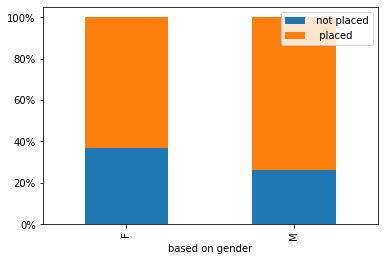%0A"
class="jp-needs-light-background" />

In \[32\]:

    placement_filtered.groupby(["gender","status"]).size().unstack()

Out\[32\]:

| status | 0   | 1   |
|--------|-----|-----|
| gender |     |     |
| 0      | 27  | 46  |
| 1      | 35  | 99  |

In \[33\]:

    #try visualization after this
    # Work Experience
    placement_filtered.groupby(["workex","status"]).size().groupby(level=0).apply(
        lambda X: 100 * X / X.sum()
    ).unstack().plot(kind='bar',stacked=True)

    plt.gca().yaxis.set_major_formatter(mp.ticker.PercentFormatter())
    plt.legend(loc = 'upper right',title = 'Status')
    ax1 = plt.subplot()
    ax1.set_xticklabels(["no","yes"]) 
    plt.xlabel("based on work experience")
    plt.legend([" not placed", "  placed"])
    plt.show()

    #Students having work experience are more likely to get placed .

<img
src="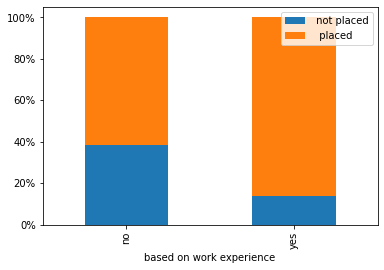%0A"
class="jp-needs-light-background" />

In \[34\]:

    placement_filtered.groupby(["workex","status"]).size().unstack()

Out\[34\]:

| status | 0   | 1   |
|--------|-----|-----|
| workex |     |     |
| 0      | 52  | 83  |
| 1      | 10  | 62  |

In \[35\]:

    # Specialization in Higher Secondary Education
    placement_filtered.groupby(["hsc_s","status"]).size().groupby(level=0).apply(
        lambda X: 100 * X / X.sum()
    ).unstack().plot(kind='bar',stacked=True)

    plt.gca().yaxis.set_major_formatter(mp.ticker.PercentFormatter())
    plt.legend(loc = 'upper right',title = 'Status')
    ax1 = plt.subplot()
    ax1.set_xticklabels(["arts","commerce", "science"]) 
    plt.xlabel("based on Higher Education Specialization")
    plt.legend([" not placed", "  placed"])
    plt.show()

    # Students from commerce and science background have more chances to get placed.

<img
src="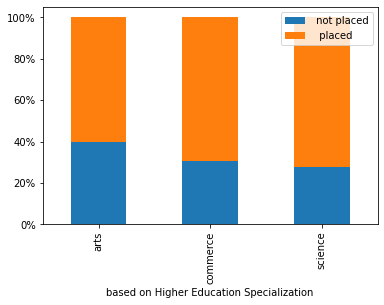%0A"
class="jp-needs-light-background" />

In \[36\]:

    # Post Graduation(MBA)- Specialization
    placement_filtered.groupby(["specialisation","status"]).size().groupby(level=0).apply(
        lambda X: 100 * X / X.sum()
    ).unstack().plot(kind='bar',stacked=True)

    plt.gca().yaxis.set_major_formatter(mp.ticker.PercentFormatter())
    plt.legend(loc = 'upper right',title = 'Status')
    ax1 = plt.subplot()
    ax1.set_xticklabels(["mrkt&finance","mrkt&HR"]) 
    plt.xlabel("based on specialization")
    plt.legend([" not placed", "  placed"])
    plt.show()

    #students from mrkt&finance are more likely to get placed than mrkt&hr

<img
src="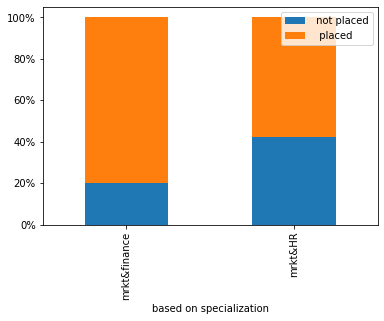%0A"
class="jp-needs-light-background" />

In \[37\]:

    from sklearn.model_selection import train_test_split

In \[38\]:

    X_train, X_test, y_train, y_test = train_test_split(X , y , test_size = 0.2, random_state = 1)

In \[39\]:

    print(X.shape, X_train.shape, X_test.shape)

    (207, 14) (165, 14) (42, 14)

In \[40\]:

    print(y.shape, y_train.shape, y_test.shape)

    (207,) (165,) (42,)

## classification model<a href="#classification-model" class="anchor-link">¶</a>

## ML Model using Logistic Regression -<a href="#ML-Model-using-Logistic-Regression--"
class="anchor-link">¶</a>

In \[47\]:

    # ML Model using Logistic Regression - 

    from sklearn.model_selection  import train_test_split
    from sklearn.linear_model import LogisticRegression
    from sklearn import linear_model

In \[48\]:

    from sklearn.linear_model import LogisticRegression
    from sklearn import metrics

    logreg = LogisticRegression()

    logreg.fit(X_train , y_train) # to fit the training data by using the training data to train our model

Out\[48\]:

    LogisticRegression()

In \[49\]:

    print(logreg.score(X_test , y_test)) #to score the testing data

    0.7380952380952381

In \[50\]:

    print(logreg.score(X_train , y_train))

    0.8909090909090909

In \[51\]:

    y_pred = logreg.predict(X_test) # and make predictions based on training data, .predict is used to 
    # store the predicted value based on the testing data
    print(y_pred)

    [0 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1
     1 1 1 1 0]

In \[52\]:

    from sklearn.metrics import confusion_matrix  
    confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
    cm_display.plot()
    plt.show()

<img
src="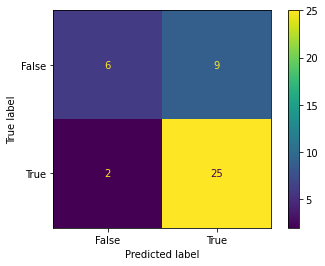%0A"
class="jp-needs-light-background" />

### Decision Tree Classifier<a href="#Decision-Tree-Classifier" class="anchor-link">¶</a>

In \[53\]:

    # Decision Tree Classifier

    from sklearn.tree import DecisionTreeClassifier 

    dt = DecisionTreeClassifier(criterion = 'gini' , max_depth = 3)

    dt = dt.fit(X_train , y_train)
    y_pred = dt.predict(X_test)

    print("Accuracy", metrics.accuracy_score(y_test , y_pred))

    Accuracy 0.7380952380952381

In \[54\]:

    from sklearn.metrics import confusion_matrix  
    confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
    cm_display.plot()
    plt.show()

<img
src="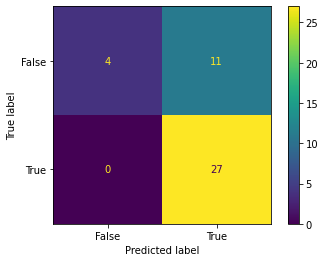%0A"
class="jp-needs-light-background" />

# #Random Forest Classifier<a href="#%23Random-Forest-Classifier" class="anchor-link">¶</a>

In \[65\]:

    #Random Forest Classifier
    from sklearn.ensemble import RandomForestClassifier

    rt = RandomForestClassifier(n_estimators = 100)

    rt.fit(X_train , y_train)
    y_pred = rt.predict(X_test)

    print("Accuracy", metrics.accuracy_score(y_test , y_pred))

    Accuracy 0.7619047619047619

In \[66\]:

    from sklearn.metrics import confusion_matrix  
    confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
    cm_display.plot()
    plt.show()

<img
src="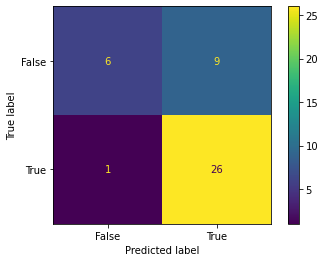%0A"
class="jp-needs-light-background" />

In \[1\]:

    import numpy as np
    import matplotlib.pyplot as plt

    barWidth = 0.20
    fig = plt.subplots(figsize =(10,4))
    accuracy=[0.7380952380952381,0.7380952380952381,0.8095238095238095]

    br1 = np.arange(len(accuracy))

    plt.bar(br1,accuracy, width = barWidth,edgecolor ='grey', label ='accuracy')
    plt.xlabel('classification model', fontweight ='bold', fontsize = 15)
    plt.ylabel('score', fontweight ='bold', fontsize = 15)
    plt.xticks([r  for r in range(len(accuracy))],['logistic', 'decisionTree', 'randomForest'])

    plt.legend()
    plt.show()

<img
src="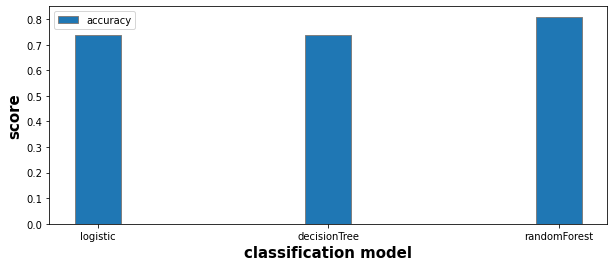%0A"
class="jp-needs-light-background" />

In \[ \]:

     

In \[ \]: